# Hald

In [3]:
hald<-read.table("hald.txt",header=T)
hald

X1,X2,X3,X4,Y
<int>,<int>,<int>,<int>,<dbl>
7,26,6,60,78.5
1,29,15,52,74.3
11,56,8,20,104.3
11,31,8,47,87.6
7,52,6,33,95.9
11,55,9,22,109.2
3,71,17,6,102.7
1,31,22,44,72.5
2,54,18,22,93.1


In [4]:
summary(hald)

       X1               X2              X3              X4           Y         
 Min.   : 1.000   Min.   :26.00   Min.   : 4.00   Min.   : 6   Min.   : 72.50  
 1st Qu.: 2.000   1st Qu.:31.00   1st Qu.: 8.00   1st Qu.:20   1st Qu.: 83.80  
 Median : 7.000   Median :52.00   Median : 9.00   Median :26   Median : 95.90  
 Mean   : 7.462   Mean   :48.15   Mean   :11.77   Mean   :30   Mean   : 95.42  
 3rd Qu.:11.000   3rd Qu.:56.00   3rd Qu.:17.00   3rd Qu.:44   3rd Qu.:109.20  
 Max.   :21.000   Max.   :71.00   Max.   :23.00   Max.   :60   Max.   :115.90  

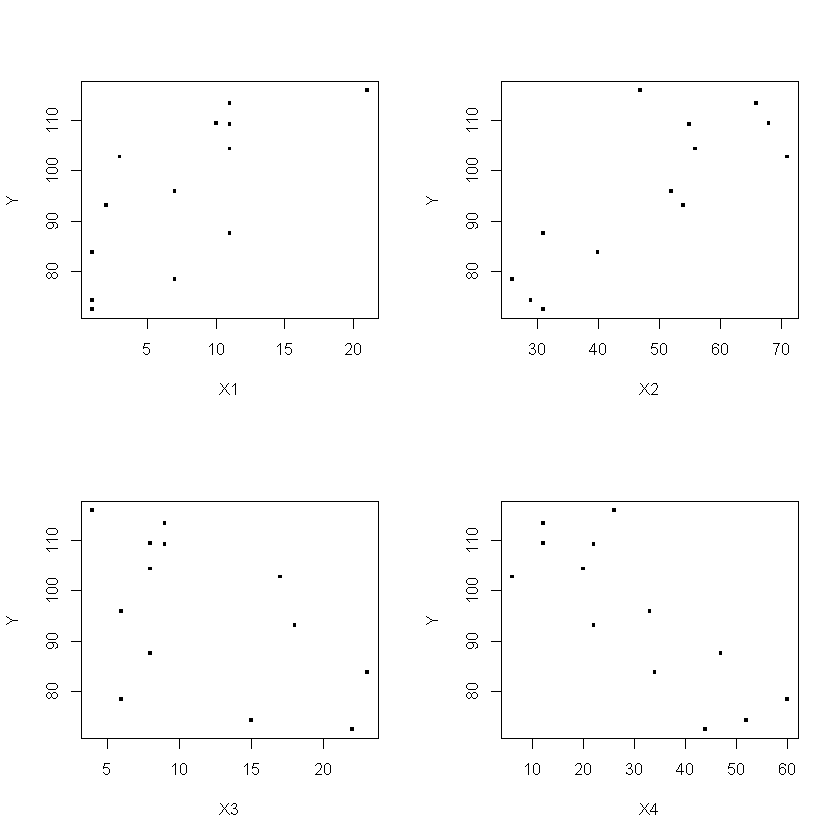

In [5]:
par(mfrow = c(2, 2)) # Dividir a janela gráfica em 2 linhas e 2 colunas

plot(Y ~ ., data = hald, pch = 15, cex = .5)


In [6]:
cor(hald)

,X1,X2,X3,X4,Y
X1,1.0000000,0.2285795,-0.8241338,-0.2454451,0.7307175
X2,0.2285795,1.0000000,-0.1392424,-0.9729550,0.8162526
X3,-0.8241338,-0.1392424,1.0000000,0.0295370,-0.5346707
X4,-0.2454451,-0.9729550,0.0295370,1.0000000,-0.8213050
Y,0.7307175,0.8162526,-0.5346707,-0.8213050,1.0000000



Call:
lm(formula = Y ~ X1 + X2 + X3 + X4, data = hald)

Coefficients:
(Intercept)           X1           X2           X3           X4  
    62.4054       1.5511       0.5102       0.1019      -0.1441  



Call:
lm(formula = Y ~ X1 + X2 + X3 + X4, data = hald)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
X1            1.5511     0.7448   2.083   0.0708 .
X2            0.5102     0.7238   0.705   0.5009  
X3            0.1019     0.7547   0.135   0.8959  
X4           -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,	Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07


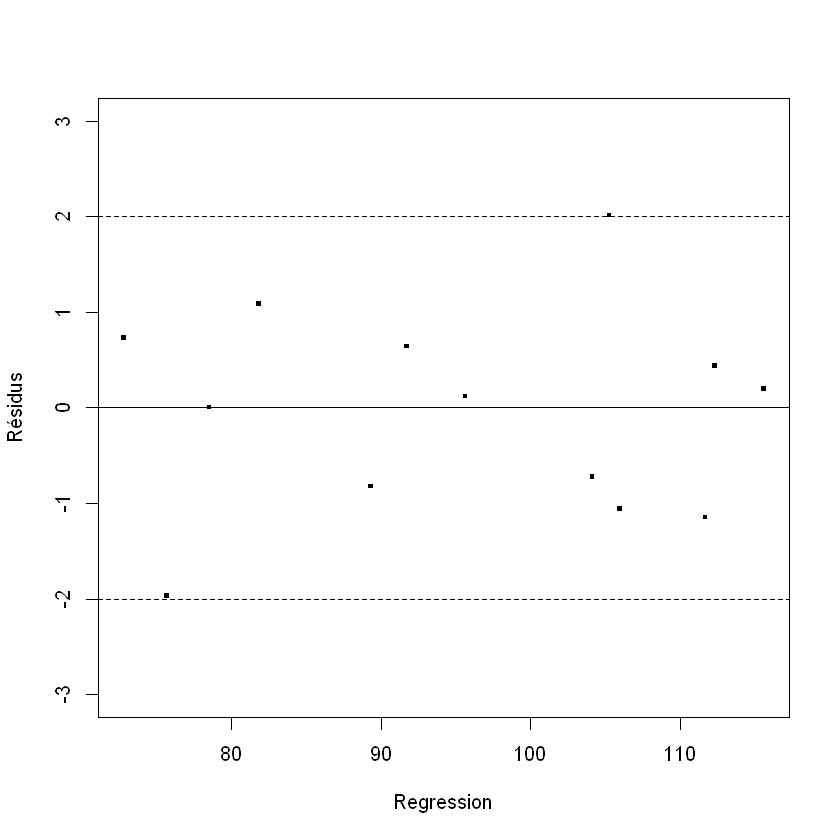

In [8]:
regression <- lm(Y ~ X1 + X2 + X3 + X4, data = hald)
regression
summary(regression)
regression2 <- rstudent(regression)
plot(regression2 ~ regression$fitted,
     pch = 15,
     cex = .5,
     ylab = "Résidus",
     xlab = "Regression",
     ylim = c(-3, 3))
abline(h = c(-2, 0, 2), lty = c(2, 1, 2))

In [9]:
library(leaps)

In [10]:
leaps <- regsubsets(Y ~ X1 + X2 + X3 + X4, data = hald, nbest = 10)

In [ ]:
plot(leaps, scale = "adjr2")
step(regression, direction = "backward")
regression_final <- lm(Y ~ X1 + X2 + X4, data = hald)
regression_final
summary(regression_final)